In [1]:
from qiskit import *
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

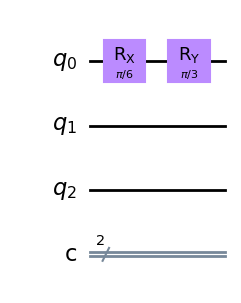

In [8]:
qc = QuantumCircuit(3,2)
qc.rx(np.pi/6,0)
qc.ry(np.pi/3,0)
qc.draw(output='mpl')

In [3]:
qc.h(1)
qc.cx(1,2)
qc.draw()

┌─────────┐┌─────────┐
q_0: ┤ Rx(π/6) ├┤ Ry(π/3) ├
     └──┬───┬──┘└─────────┘
q_1: ───┤ H ├────────■─────
        └───┘      ┌─┴─┐   
q_2: ──────────────┤ X ├───
                   └───┘   
c: 2/══════════════════════

In [4]:
qc.cx(0,1)
qc.h(0)
qc.draw()

┌─────────┐┌─────────┐     ┌───┐
q_0: ┤ Rx(π/6) ├┤ Ry(π/3) ├──■──┤ H ├
     └──┬───┬──┘└─────────┘┌─┴─┐└───┘
q_1: ───┤ H ├────────■─────┤ X ├─────
        └───┘      ┌─┴─┐   └───┘     
q_2: ──────────────┤ X ├─────────────
                   └───┘             
c: 2/════════════════════════════════

In [5]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌─────────┐┌─────────┐     ┌───┐┌─┐
q_0: ┤ Rx(π/6) ├┤ Ry(π/3) ├──■──┤ H ├┤M├
     └──┬───┬──┘└─────────┘┌─┴─┐└┬─┬┘└╥┘
q_1: ───┤ H ├────────■─────┤ X ├─┤M├──╫─
        └───┘      ┌─┴─┐   └───┘ └╥┘  ║ 
q_2: ──────────────┤ X ├──────────╫───╫─
                   └───┘          ║   ║ 
c: 2/═════════════════════════════╩═══╩═
                                  1   0

In [6]:
qc.z(2).c_if(0, 1)  
qc.x(2).c_if(1, 1) 
qc.draw()

┌─────────┐┌─────────┐     ┌───┐┌─┐                      
q_0: ┤ Rx(π/6) ├┤ Ry(π/3) ├──■──┤ H ├┤M├──────────────────────
     └──┬───┬──┘└─────────┘┌─┴─┐└┬─┬┘└╥┘                      
q_1: ───┤ H ├────────■─────┤ X ├─┤M├──╫───────────────────────
        └───┘      ┌─┴─┐   └───┘ └╥┘  ║    ┌───┐      ┌───┐   
q_2: ──────────────┤ X ├──────────╫───╫────┤ Z ├──────┤ X ├───
                   └───┘          ║   ║    └─╥─┘      └─╥─┘   
                                  ║   ║ ┌────╨────┐┌────╨────┐
c: 2/═════════════════════════════╩═══╩═╡ c_0=0x1 ╞╡ c_1=0x1 ╞
                                  1   0 └─────────┘└─────────┘

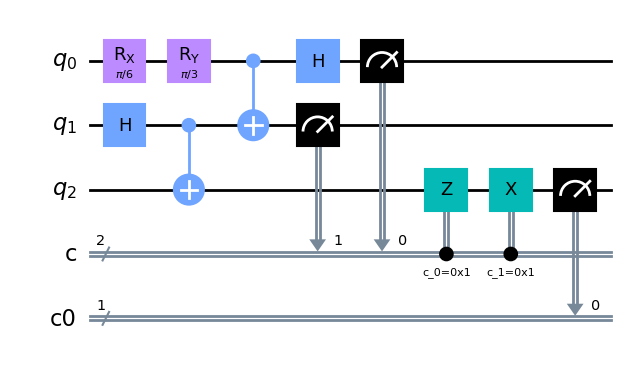

In [7]:
cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(2,2)
qc.draw(output='mpl')

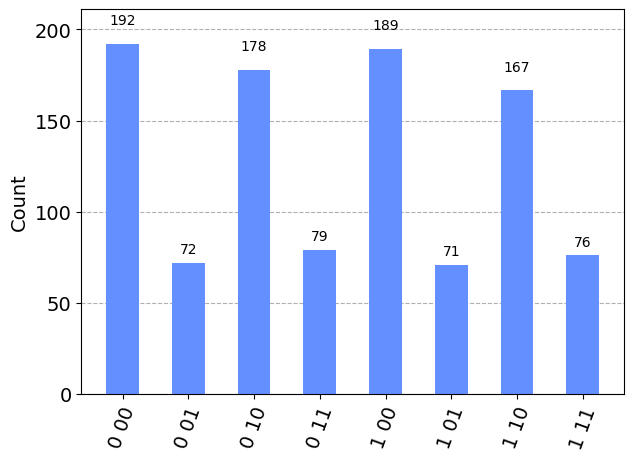

In [19]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()
plot_histogram(result.get_counts(qc))

In [ ]:
#as we can see cr_result is 0- 726 times and 1- 298 times, which is very similar to initial qubit